In [43]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw
from rdkit.Chem import BondType
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
import torch
from rdkit.Chem import MACCSkeys, AllChem, Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy 
from rdkit.Chem import AllChem, MACCSkeys
from openbabel import pybel
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Arial"]
import warnings
warnings.filterwarnings('ignore')
from rdkit.Chem import rdchem
pd.set_option('display.max_rows',None)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.layers import Dense, Dropout

In [44]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw
from rdkit.Chem import BondType
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.feature_selection import VarianceThreshold
import torch
import numpy as np
from rdkit.Chem import MACCSkeys, AllChem, Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy 
from rdkit.Chem import AllChem, MACCSkeys
from openbabel import pybel
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem, MACCSkeys
from openbabel import pybel
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Arial"]
import warnings
warnings.filterwarnings('ignore')
from rdkit.Chem import rdchem
pd.set_option('display.max_rows',None)

In [45]:
data = pd.read_csv('../data/dn-beta-data.csv')

In [46]:
data

Unnamed: 0                                               Name  \
0             2                                 1,2,3-propanetriol   
1             3                                  1,2-diaminoethane   
2             4                                1,2-dichlorobenzene   
3             5                                 1,2-dichloroethane   
4             6                                1,2-dimethoxyethane   
5             7                         1,3,2-dioxathiolan-2-oxide   
6             8          1,3,3-trimethyl-2-oxabicyclo[2.2.2]octane   
7             9                             1,3,5-trimethylbenzene   
8            10                                1,3-dichlorobenzene   
9            11                     1,3-dimethyl-2-imidazolidinone   
10           12                                1,3-dimethylbenzene   
11           13          1,3-dimethyltetrahydropyrimidin-2(1H)-one   
12           14                                   1,3-dimethylurea   
13           15                                 1,3-dioxolan-2-one   
14           16                                      1,3-dioxolane   
15           17                                1,4-dimethylbenzene   
16           18           1-di(piperidin-1-yl)phosphorylpiperidine   
17           19                               1-methylazepan-2-one   
18           21              2,2,2-trifluoro-N,N-dimethylacetamide   
19           23                    2,2,4,4-tetramethyl-3-pentanone   
20           24                        2,2,4-trimethylpentan-3-one   
21           25                     2,2,5,5-tetramethylhexan-3-one   
22           26                    2,2,6,6-tetramethyl-4-heptanone   
23           27                           2,2-dimethylpentan-3-one   
24           28                                    2,3-butanedione   
25           29                           2,4-dimethyl-3-pentanone   
26           30                           2,6-dimethyl-4-heptanone   
27           32                                         2-butanone   
28           33                                    2-chloroaniline   
29           34                                    2-chloroethanol   
30           35                                2-methyl-1-propanol   
31           36                                 2-methyl-2-butanol   
32           37                             2-methyl-2-propanamine   
33           38                                2-methyl-2-propanol   
34           39                               2-methylpentan-3-one   
35           40                             2-methylpropanenitrile   
36           41                            2-methyltetrahydrofuran   
37           42                                        2-pentanone   
38           43                               2-phenylacetonitrile   
39           44                                    2-phenylethanol   
40           45                                         2-propanol   
41           46                                        2-propanone   
42           47                            3,3-dimethyl-2-butanone   
43           48                                 3-methyl-1-butanol   
44           49                                3-methyl-2-butanone   
45           51                                   3-methylpyridine   
46           52                                        3-pentanone   
47           53             4,4,5,5-tetrachloro-1,3-dioxolan-2-one   
48           54                    4,5-dichloro-1,3-dioxolan-2-one   
49           55                       4-methyl-2-oxo-1,3-dioxolane   
50           56                               4-methyl-2-pentanone   
51           57                                   4-methylpyridine   
52           58                           4-methylpyridine N-oxide   
53           59                                        acetic acid   
54           60                                   acetic anhydride   
55           61                                       acetonitrile   
56           62

In [47]:
descriptors_list = ['FractionCSP3', 'MaxPartialCharge', 'fr_NH0', 'SMR_VSA3', 'PEOE_VSA3',
       'MinEStateIndex', 'MinAbsPartialCharge', 'SlogP_VSA2', 'EState_VSA4',
       'PEOE_VSA13', 'PEOE_VSA8', 'MaxAbsEStateIndex', 'VSA_EState2',
       'RingCount', 'HallKierAlpha', 'PEOE_VSA2', 'PEOE_VSA1', 'EState_VSA7',
       'SMR_VSA9', 'PEOE_VSA7', 'EState_VSA3', 'PEOE_VSA9', 'VSA_EState6',
       'fr_para_hydroxylation', 'EState_VSA6', 'FpDensityMorgan1',
       'NumSaturatedHeterocycles', 'EState_VSA2', 'EState_VSA8', 'PEOE_VSA10',
       'SlogP_VSA4', 'SMR_VSA2', 'fr_ether', 'MinPartialCharge', 'NHOHCount',
       'NumHDonors', 'fr_amide', 'EState_VSA9', 'SMR_VSA10', 'EState_VSA1',
       'VSA_EState10', 'BCUT2D_LOGPHI', 'PEOE_VSA6', 'fr_ketone_Topliss',
       'fr_halogen', 'VSA_EState1', 'fr_ester', 'FpDensityMorgan3',
       'HeavyAtomMolWt', 'PEOE_VSA12', 'NumHeteroatoms', 'VSA_EState3',
       'BertzCT', 'EState_VSA10', 'SMR_VSA5', 'Chi0']

class additive_feature:
    def __init__(self, smiles):
        self.smiles = smiles

    def MACCS(self):
        mol = Chem.MolFromSmiles(self.smiles)
        if mol is None:
            raise ValueError(f"Cannot create mol object from SMILES: {self.smiles}")
        fp = MACCSkeys.GenMACCSKeys(mol)
        fingerprint = list(int(bit) for bit in fp.ToBitString())
        return np.array(fingerprint).reshape(1, 167)

    def FP2(self):
        fp2 = np.zeros((1, 1024))
        mol = pybel.readstring('smi', self.smiles)
        fp_bits = mol.calcfp().bits
        for i in fp_bits:
            fp2[0][int(i)] = 1
        return fp2

    def ECFP(self):
        mol = Chem.MolFromSmiles(self.smiles)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 6, nBits=2048)
        fingerprint = list(int(bit) for bit in fp.ToBitString())
        return np.array(fingerprint).reshape(1, 2048)

    def descriptors(self):
        mol = Chem.MolFromSmiles(self.smiles)
        descriptors = MoleculeDescriptors.MolecularDescriptorCalculator(descriptors_list)
        result = descriptors.CalcDescriptors(mol)
        return np.array(result)

In [48]:
def process_smiles(smiles, scaler=None, imputer=None, input_descriptors=None):

    if input_descriptors is None:
        descriptors = additive_feature(smiles).descriptors().reshape(1, -1)
        descriptors_2 = data.loc[data['SMILES'] == smiles, ['mulliken_charge', 'humo_energy', 'energy_difference']].drop_duplicates().iloc[0]
        descriptors_2 = descriptors_2.values.reshape(1, -1)
        descriptors = np.concatenate((descriptors, descriptors_2), axis=1)
    else:
        descriptors = additive_feature(smiles).descriptors().reshape(1, -1)
        descriptors_2 = input_descriptors
        descriptors_2 = descriptors_2.reshape(1, -1)
        descriptors = np.concatenate((descriptors, descriptors_2), axis=1)
    if scaler is not None and imputer is not None:
        descriptors = scaler.transform(descriptors)
        descriptors = imputer.transform(descriptors)
    maccs = additive_feature(smiles).MACCS().flatten()
    return np.concatenate((descriptors.flatten(), maccs))

X_raw = data['SMILES']
y = data['DN'].values

initial_descriptors1 = np.vstack(X_raw.apply(lambda x: additive_feature(x).descriptors().flatten().reshape(1, -1)))
initial_descriptors2 = data[['mulliken_charge', 'humo_energy', 'energy_difference']].values

initial_descriptors= np.hstack((initial_descriptors1, initial_descriptors2))
scaler = StandardScaler().fit(initial_descriptors)
imputer = SimpleImputer(strategy='mean').fit(initial_descriptors)
scaler = StandardScaler().fit(initial_descriptors)
imputer = SimpleImputer(strategy='mean').fit(initial_descriptors)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=150, random_state=45,max_depth=5),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=46),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.05, subsample=0.7, max_depth=5),
    'LightGBM': LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    num_leaves=70,         
    max_depth=12,          
    min_child_samples=10,  
    min_split_gain=0.0,    
    colsample_bytree=1.0,  
    subsample=1.0,         
    subsample_freq=0,     
    random_state=42
),
    'Neural Network' :None
}

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=76)  
results = {name: {'MSE': [], 'MAE': [], 'RMSE': [], 'R2': []} for name in models}
nn_train_loss = []
nn_val_loss = []

In [50]:
model_dir = './model/3_elected_descriptors_model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

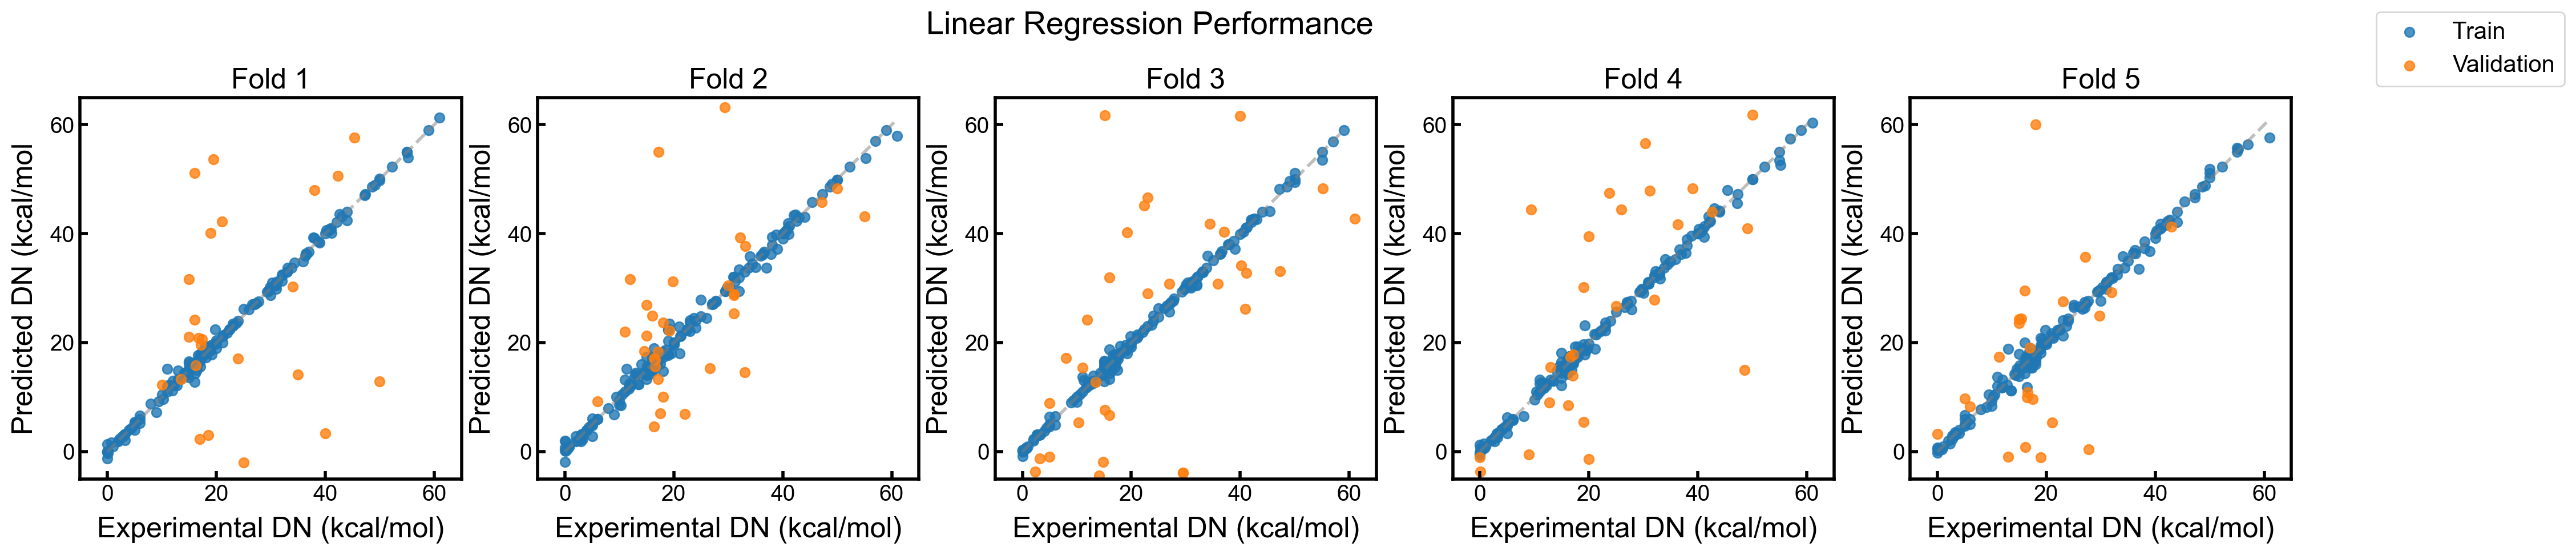

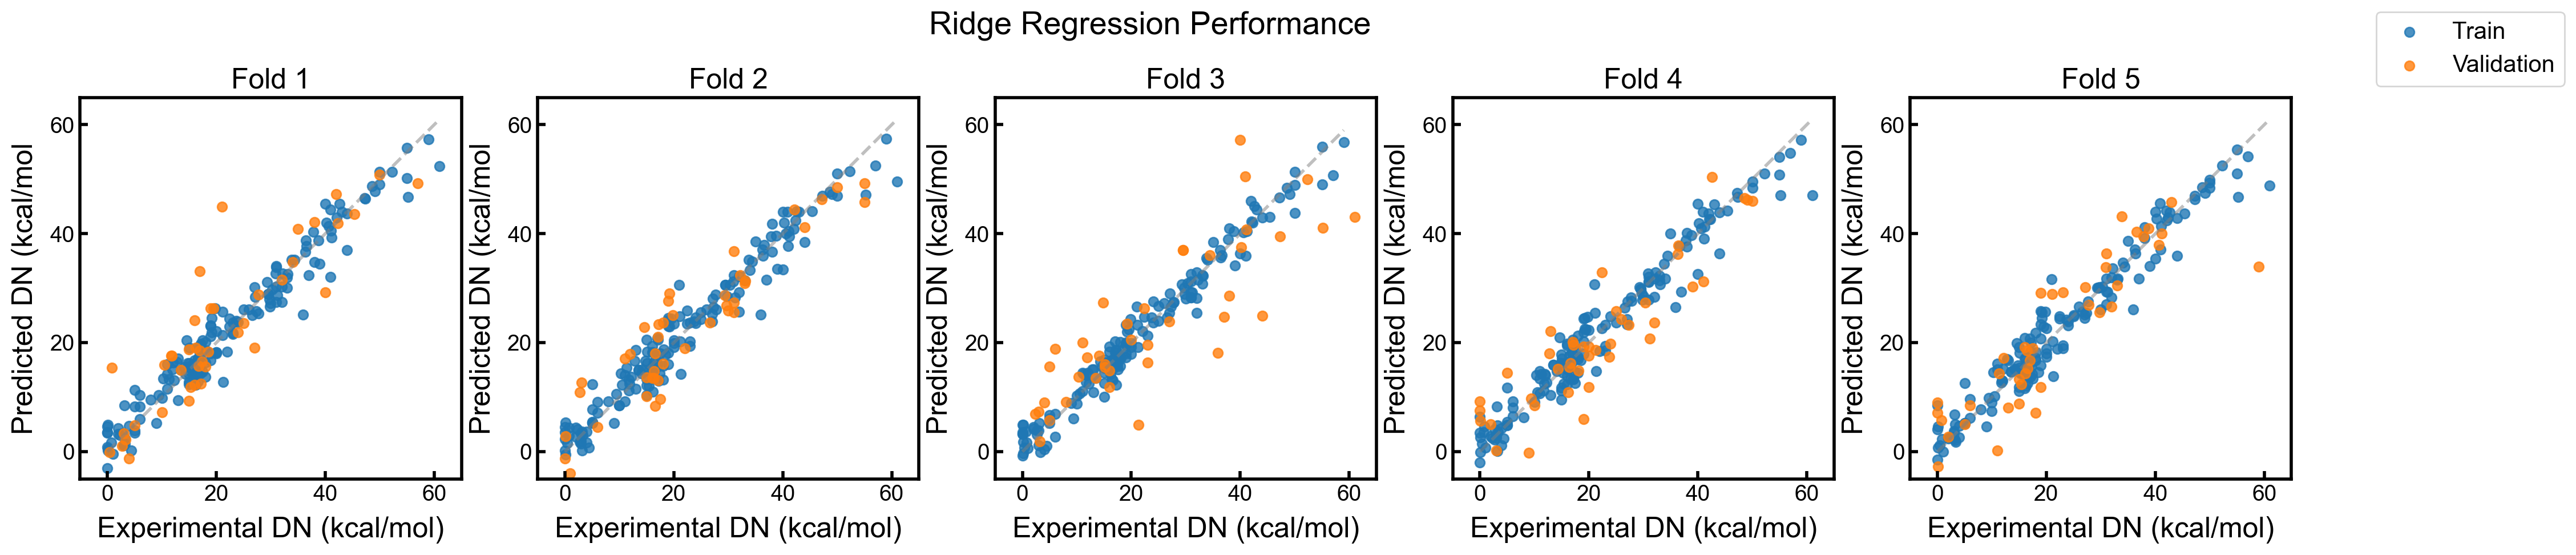

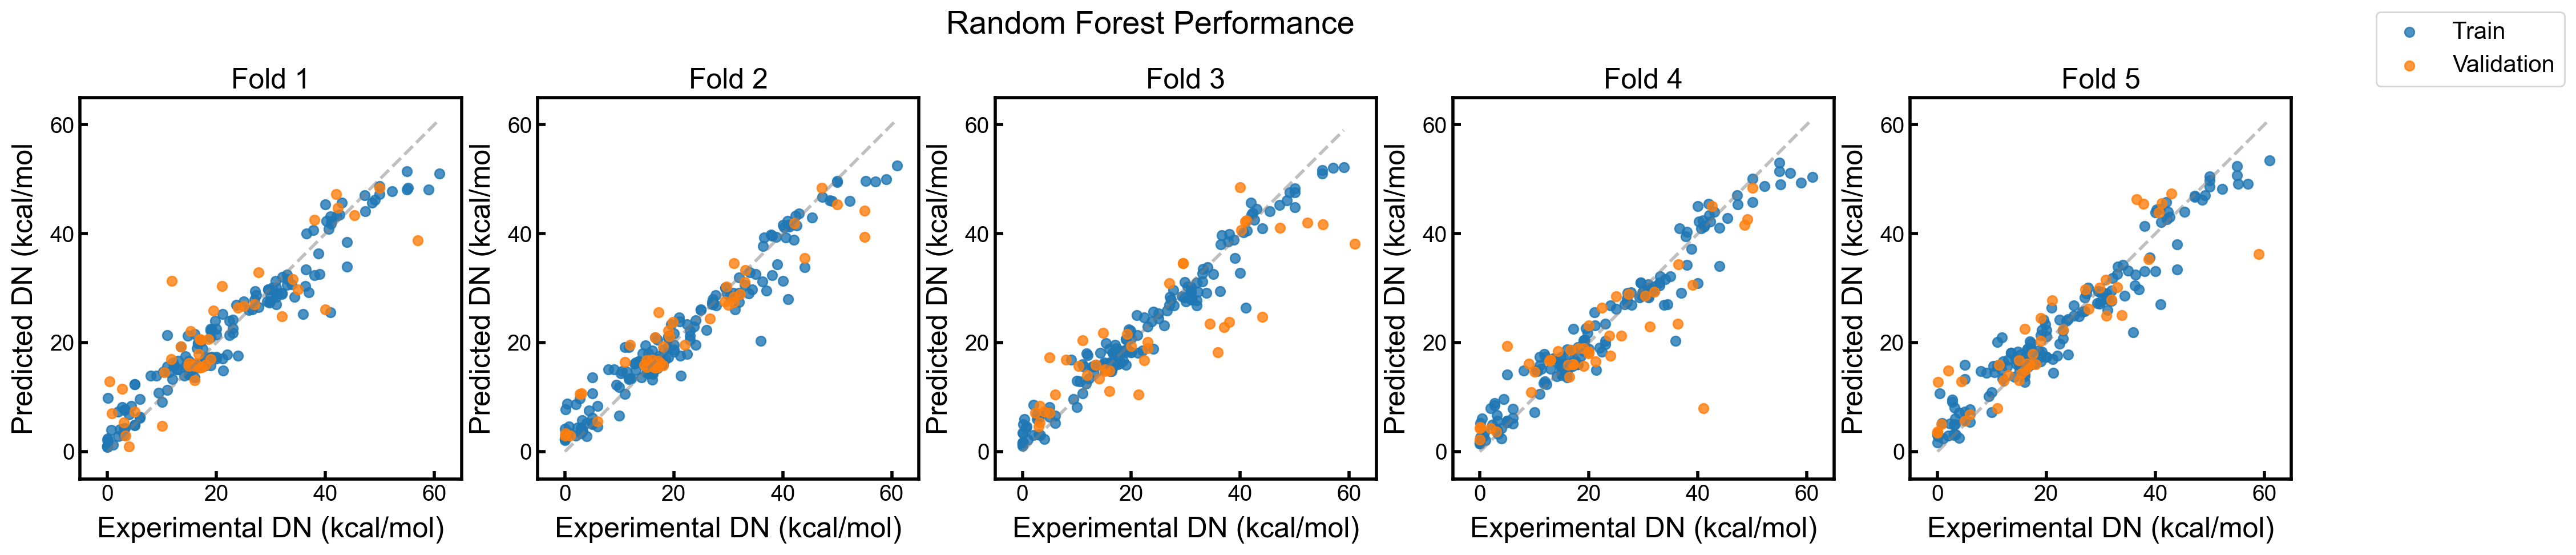

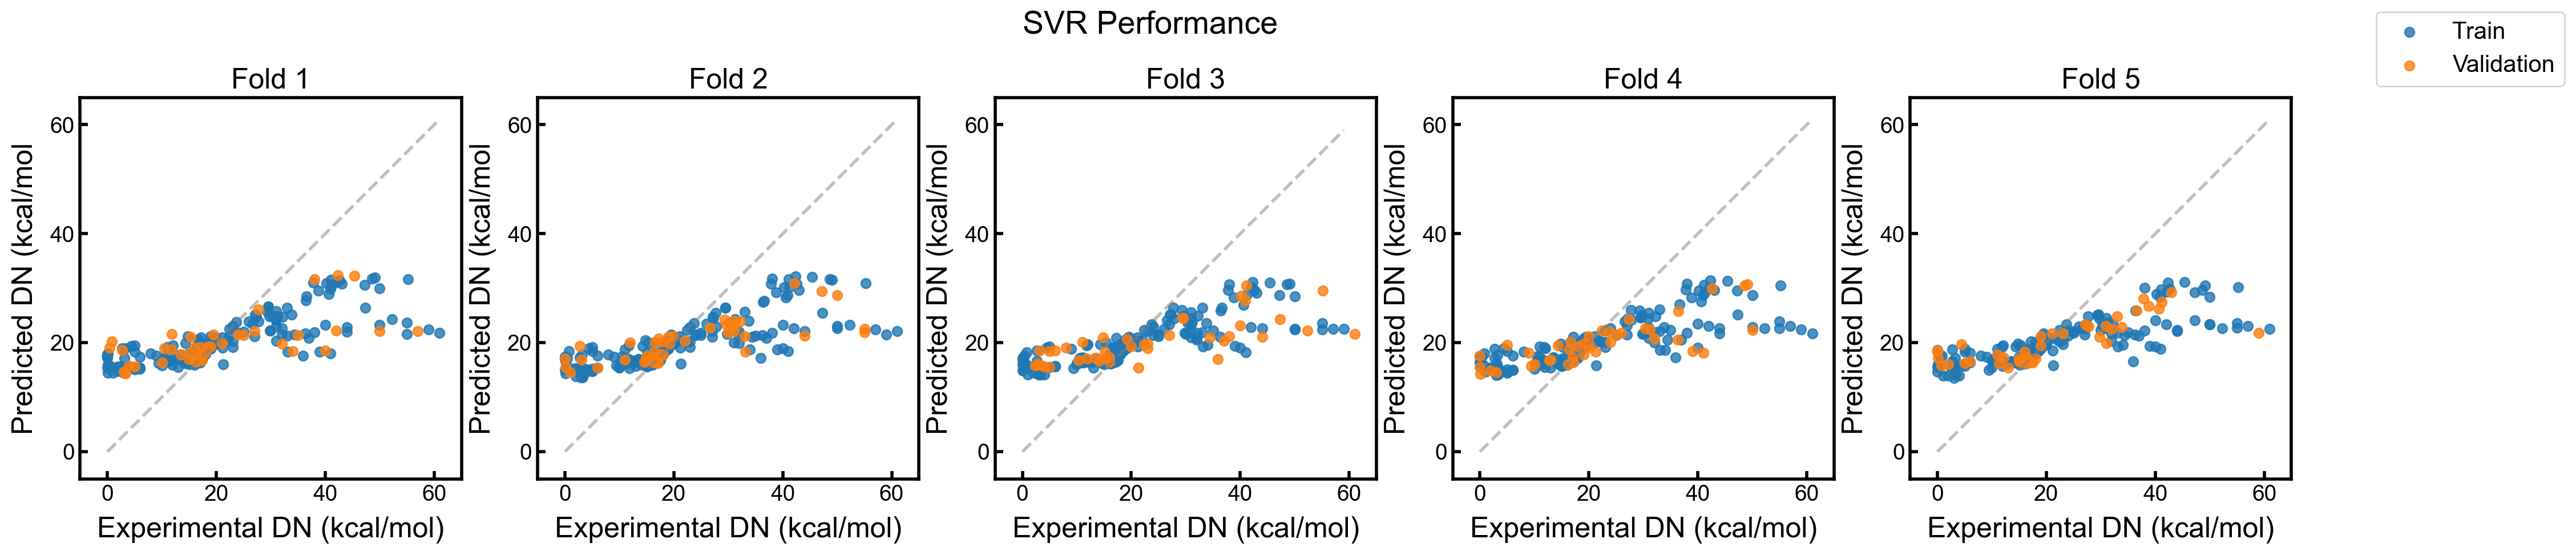

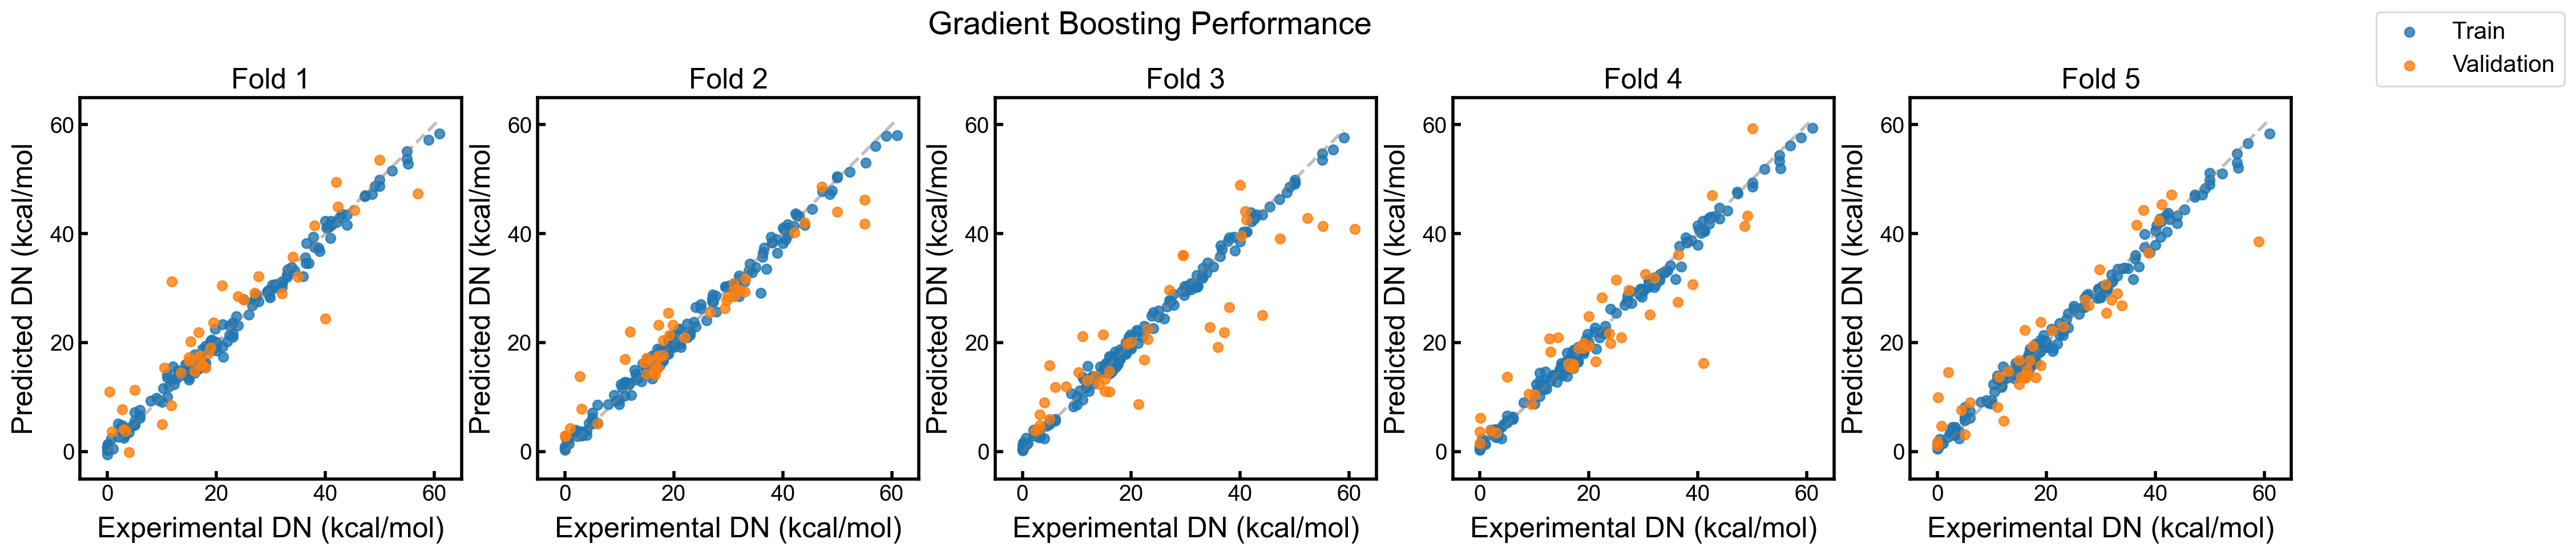

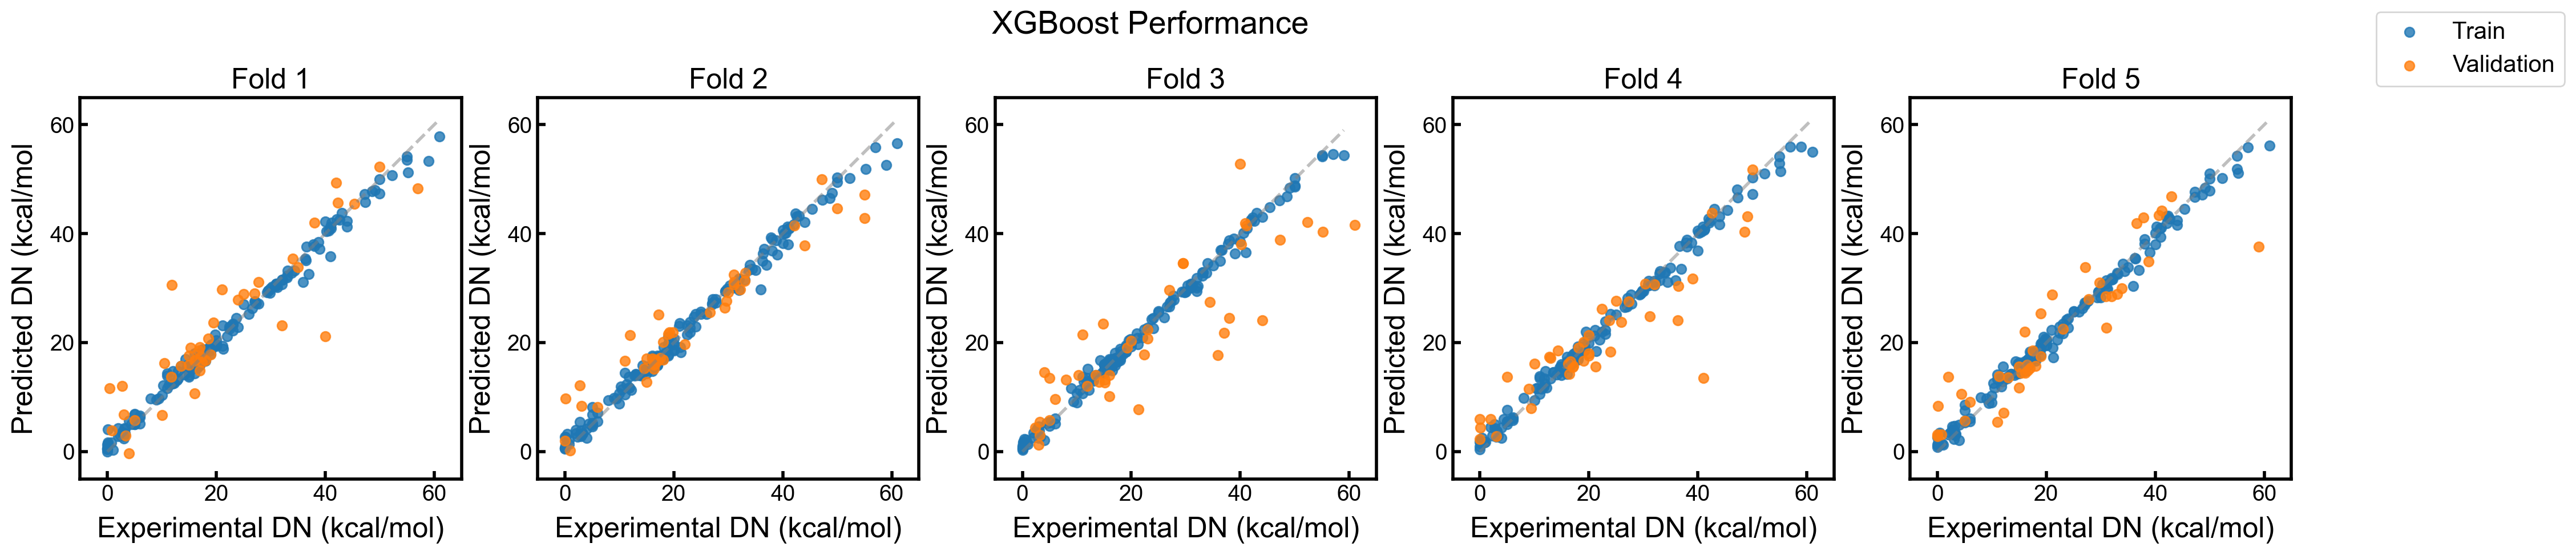

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1366
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 124
[LightGBM] [Info] Start training from score 22.087879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

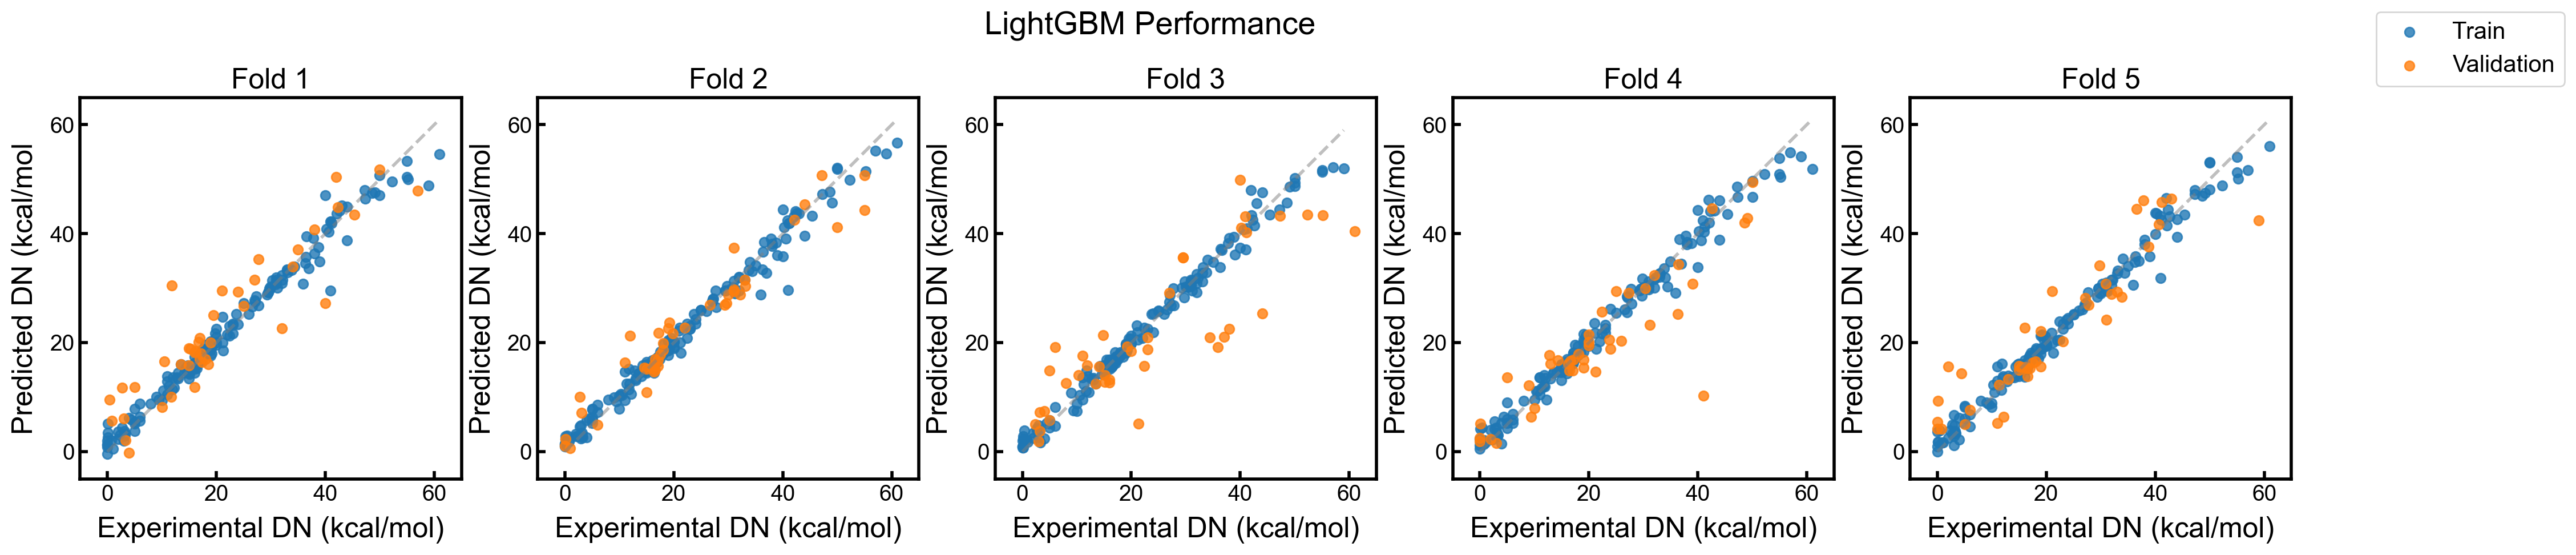

2/2 [==============================] - 0s 2ms/step


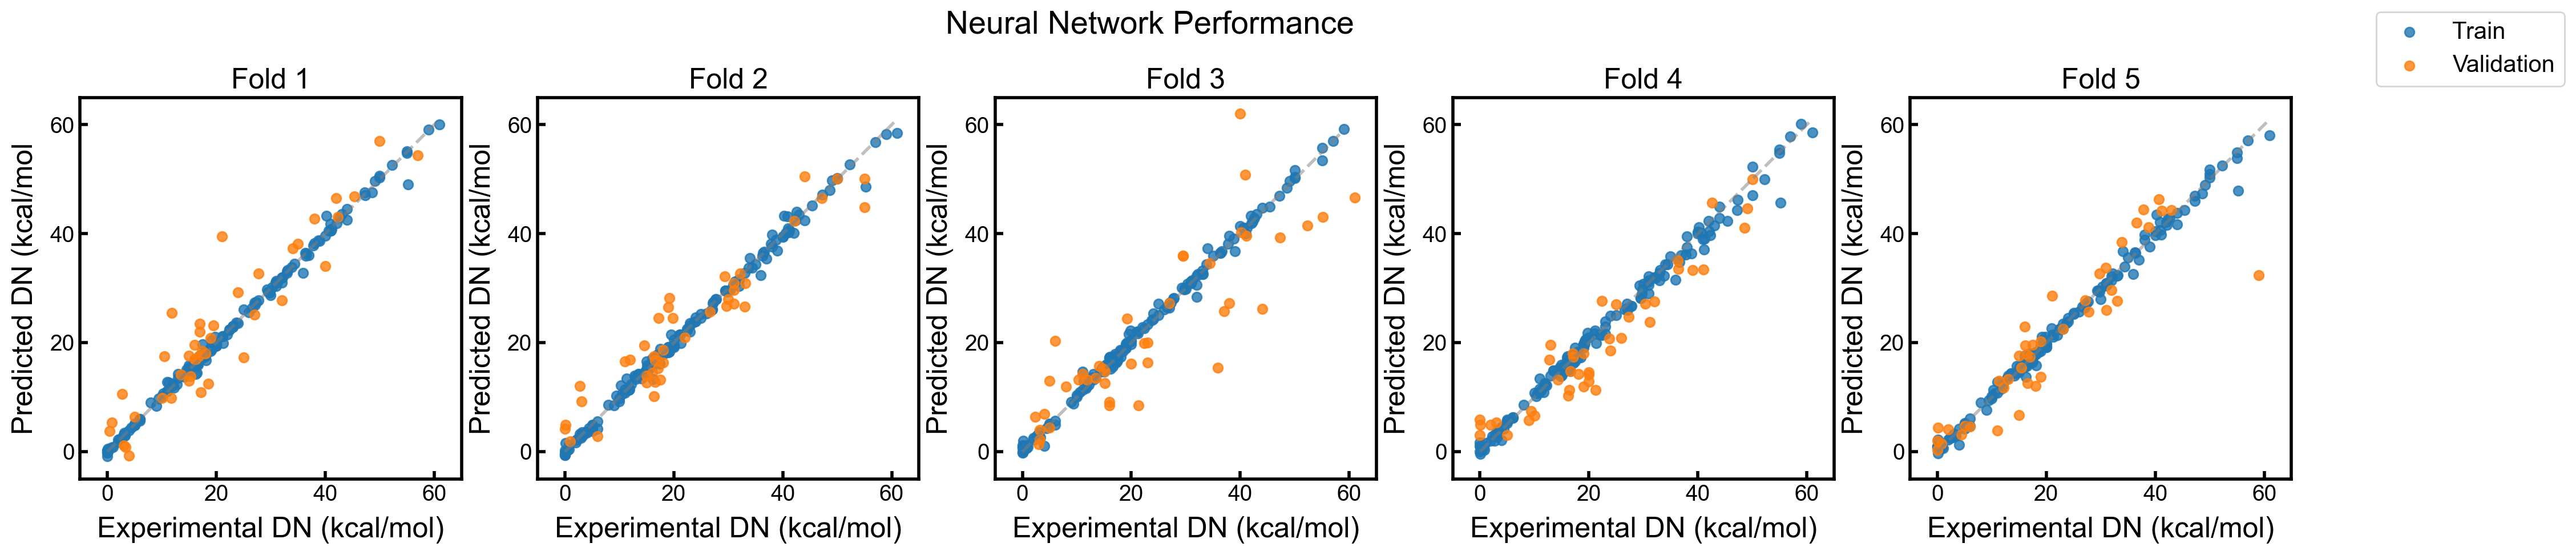

In [51]:
selected_fold = 5  
last_model_name ='Neural Network'  
selected_data = {}  

for name, model in models.items():
    fold = 1
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))  
    for train_index, test_index in kf.split(X_raw):
        X_train_raw, X_test_raw = X_raw.iloc[train_index], X_raw.iloc[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        X_train_cv = np.vstack(X_train_raw.apply(lambda x: process_smiles(x, scaler, imputer)))
        X_test_cv = np.vstack(X_test_raw.apply(lambda x: process_smiles(x, scaler, imputer)))

        if name == 'Neural Network':
            model = Sequential([
                Dense(128, activation='relu', input_dim=X_train_cv.shape[1]),
                Dense(32, activation='relu'),
                Dense(1)
            ])
            model.compile(optimizer='adam', loss='mse')
            history = model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=10, verbose=0, validation_data=(X_test_cv, y_test_cv))
            predictions_train = model.predict(X_train_cv).flatten()
            predictions_test = model.predict(X_test_cv).flatten()
            nn_train_loss.append(history.history['loss'])
            nn_val_loss.append(history.history['val_loss'])

            model.save(os.path.join(model_dir, f'nn_model_fold_{fold}.h5'))
        else:
            model.fit(X_train_cv, y_train_cv)
            predictions_train = model.predict(X_train_cv)
            predictions_test = model.predict(X_test_cv)
            joblib.dump(model, os.path.join(model_dir, f'{name}_model_fold_{fold}.joblib'))
            
        if fold == selected_fold and name == last_model_name:
            selected_data = {
                'y_train_cv': y_train_cv,
                'predictions_train': predictions_train,
                'y_test_cv': y_test_cv,
                'predictions_test': predictions_test
            }

        mse = mean_squared_error(y_test_cv, predictions_test)
        mae = mean_absolute_error(y_test_cv, predictions_test)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_cv, predictions_test)
        
        results[name]['MSE'].append(mse)
        results[name]['MAE'].append(mae)
        results[name]['RMSE'].append(rmse)
        results[name]['R2'].append(r2)
        axes[fold - 1].scatter(y_train_cv, predictions_train, label='Train', alpha=0.8)
        axes[fold - 1].scatter(y_test_cv, predictions_test, label='Validation', alpha=0.8)
        axes[fold - 1].plot([y_train_cv.min(), y_train_cv.max()], [y_train_cv.min(), y_train_cv.max()], 'k--', 
                            lw=2, color='grey', alpha=0.5)
        axes[fold - 1].set_title(f'Fold {fold}', fontsize=18)
        axes[fold - 1].set_xlabel('Experimental DN (kcal/mol)', fontsize=18, labelpad=7)
        axes[fold - 1].set_ylabel('Predicted DN (kcal/mol', fontsize=18, labelpad=7)
        axes[fold - 1].set_xlim(-5, 65)
        axes[fold - 1].set_ylim(-5, 65)
        axes[fold - 1].set_xticks([0, 20, 40, 60])
        axes[fold - 1].set_yticks([0, 20, 40, 60])
        axes[fold - 1].tick_params(axis='both', which='major', length=5, width=2, direction='in', labelsize=14)
        axes[fold - 1].set_aspect('equal', 'box')
        for spine in axes[fold - 1].spines.values():
            spine.set_linewidth(2)

        fold += 1

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize=15)
    fig.suptitle(f'{name} Performance', fontsize=20)
    plt.show()



In [52]:
average_results = {name: {metric: np.mean(scores) for metric, scores in metrics.items()} for name, metrics in results.items()}
average_results_df = pd.DataFrame.from_dict(average_results, orient='index')
print(average_results_df)

                            MSE        MAE        RMSE         R2
Linear Regression  14838.527491  55.644615  105.529418 -76.663295
Ridge Regression      45.209269   5.025910    6.610972   0.781527
Random Forest         43.887164   4.580432    6.506434   0.785986
SVR                  139.237337   8.688309   11.749364   0.317343
Gradient Boosting     35.745759   4.175710    5.845441   0.828243
XGBoost               38.097776   4.217667    6.023483   0.816950
LightGBM              37.768133   4.228689    5.950473   0.818827
Neural Network        34.328759   4.248395    5.681503   0.837804


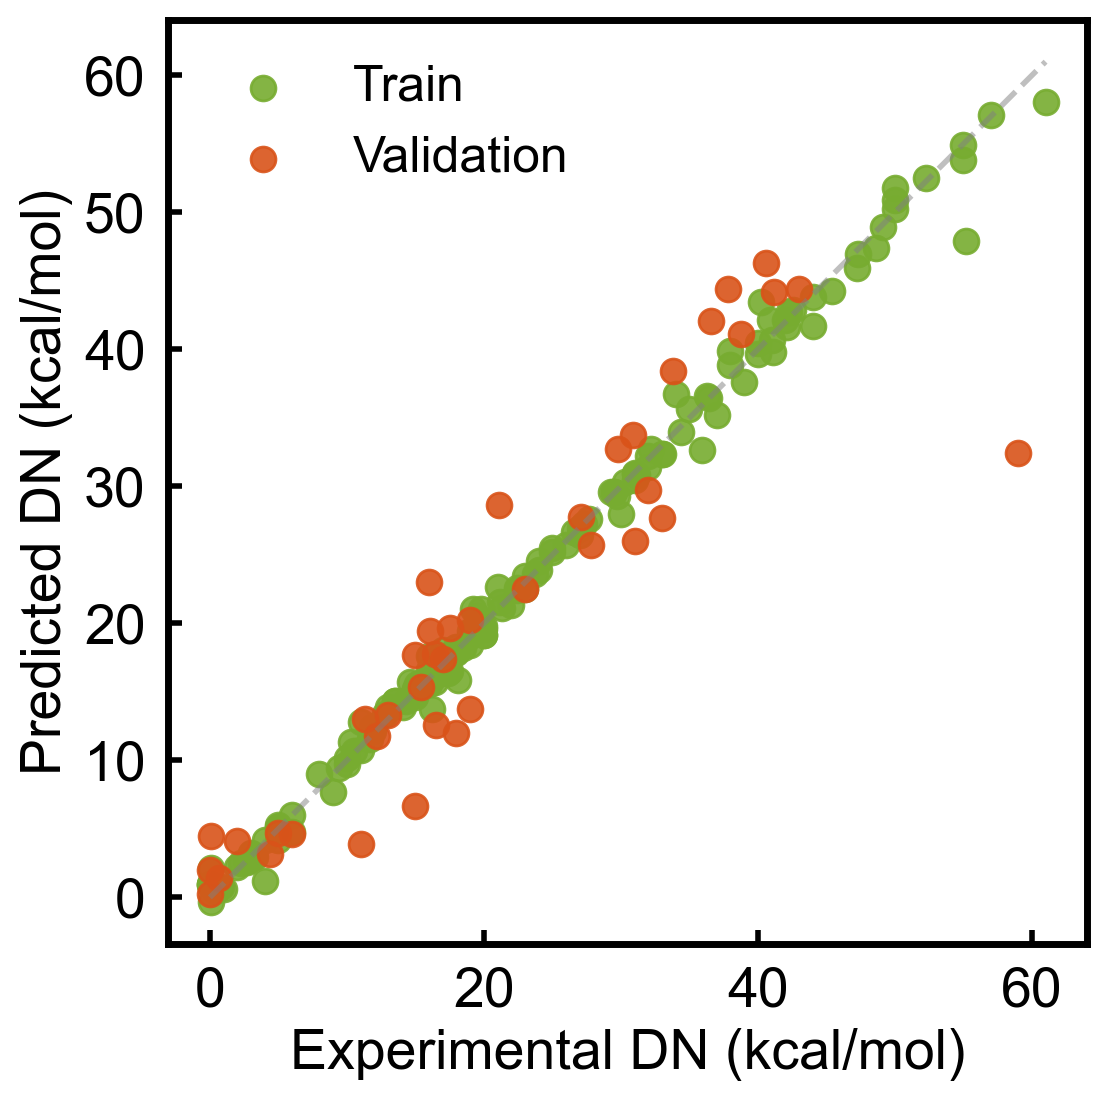

In [53]:
if selected_data:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(selected_data['y_train_cv'], selected_data['predictions_train'], label='Train', alpha=0.9, s=80, color='#77ac30')
    ax.scatter(selected_data['y_test_cv'], selected_data['predictions_test'], label='Validation', alpha=0.9, s=80, color='#d95319')
    ax.plot([selected_data['y_train_cv'].min(), selected_data['y_train_cv'].max()], [selected_data['y_train_cv'].min(), selected_data['y_train_cv'].max()], 'k--', lw=2, color='grey', alpha=0.5)
    
    # ax.set_title(f'Results of {last_model_name} - 5th Fold', fontsize=18)
    ax.set_xlabel('Experimental DN (kcal/mol)', fontsize=20)
    ax.set_ylabel('Predicted DN (kcal/mol)', fontsize=20)
    ax.tick_params(axis='both', which='major', length=5, width=2, direction='in', labelsize=20, pad = 8)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        ax.set_aspect('equal', 'box')
    ax.set_aspect('equal', 'box')
    ax.legend(loc='upper left', fontsize=18 , frameon = False) 
    plt.show()

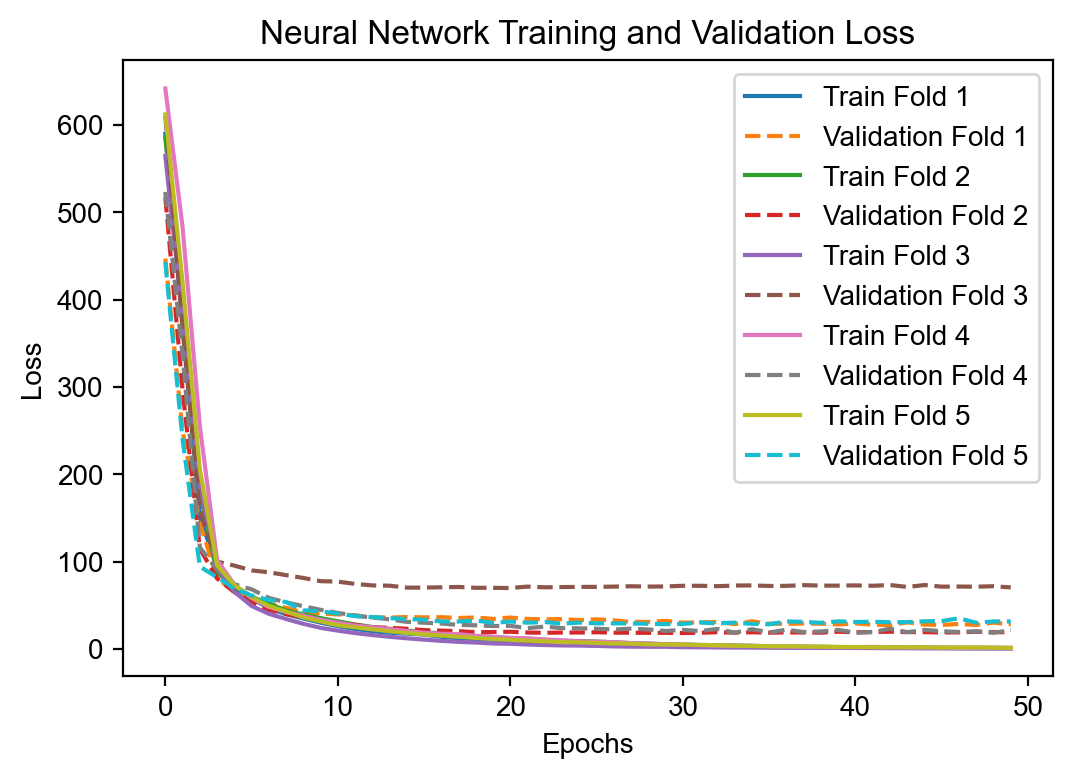

In [54]:
plt.figure(figsize=(6,4))
for i in range(len(nn_train_loss)):
    plt.plot(nn_train_loss[i], label=f'Train Fold {i+1}')
    plt.plot(nn_val_loss[i], label=f'Validation Fold {i+1}', linestyle='dashed')
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
# predict new mols
def predict_new_molecule(new_smiles, new_descriptors, models, scaler, imputer):
   
    new_X_raw = process_smiles(new_smiles, scaler, imputer, new_descriptors).reshape(1, -1)
    
    new_predictions = {}
    for name, model in models.items():
        if name == 'Neural Network':
            predictions = []
            for fold in range(1, 6):
              
                model = load_model(os.path.join(model_dir, f'nn_model_fold_{fold}.h5'))#修改地址
                prediction = model.predict(new_X_raw).flatten()[0]
                predictions.append(prediction)
                print(prediction)
            new_predictions[name] = np.mean(predictions)
        else:
            predictions = []
            for fold in range(1, 6):
               
                model = joblib.load(os.path.join(model_dir, f'{name}_model_fold_{fold}.joblib'))
                prediction = model.predict(new_X_raw)[0]
                predictions.append(prediction)
            new_predictions[name] = np.mean(predictions)
    
    return new_predictions

# example
new_smiles = "C1COCCN1C=O"  
new_descriptors = np.array([-0.307, -0.268, 0.573]) 
predictions = predict_new_molecule(new_smiles, new_descriptors, models, scaler, imputer)
average_new_predictions_df = pd.DataFrame.from_dict(predictions, orient='index', columns=['Average Prediction'])
print(average_new_predictions_df)

1/1 [==============================] - 0s 45ms/step
26.239336
1/1 [==============================] - 0s 40ms/step
24.938791
1/1 [==============================] - 0s 47ms/step
24.653656
1/1 [==============================] - 0s 44ms/step
21.509716
1/1 [==============================] - 0s 46ms/step
22.423168
                   Average Prediction
Linear Regression          250.815333
Ridge Regression            28.823660
Random Forest               28.440701
SVR                         22.703769
Gradient Boosting           27.612708
XGBoost                     28.258652
LightGBM                    29.305330
Neural Network              23.952936
